In [ ]:
import numpy as np # converting to array
import matplotlib.pyplot as plt # visualizing the matrixes
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch
from torchvision import datasets, transforms # downloading the dataset
import keras
from keras.models import Sequential # building the model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split 

In [ ]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 10
input_shape = (28, 28, 1)

# ✅ 1. Download MNIST using PyTorch
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# ✅ 2. Convert to NumPy arrays
x_train_full = train_dataset.data.numpy()
y_train_full = train_dataset.targets.numpy()
x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()

# ✅ 3. Split train_full into train + validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.1, random_state=42, stratify=y_train_full)

# ✅ 4. Reshape to (samples, 28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# ✅ 5. Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# ✅ 6. Convert labels to one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# ✅ 7. Final info
print("Train set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)


Train set: (54000, 28, 28, 1) (54000, 10)
Validation set: (6000, 28, 28, 1) (6000, 10)
Test set: (10000, 28, 28, 1) (10000, 10)


In [ ]:
# 8. Build a deeper MLP

batch_size = 128
num_classes = 10
epochs = 15

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

c:\Helia\programming\AIcourse\HW3\tfenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 9. Train the model
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_val, y_val))
print("The model has successfully trained")

# model.save('mnist.h5')
# print("Saving the model as mnist.h5")

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.1447 - loss: 2.2889 - val_accuracy: 0.3528 - val_loss: 2.2244
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.2894 - loss: 2.2134 - val_accuracy: 0.5813 - val_loss: 2.1336
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.4221 - loss: 2.1239 - val_accuracy: 0.6582 - val_loss: 2.0170
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.5134 - loss: 2.0076 - val_accuracy: 0.6985 - val_loss: 1.8640
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.5804 - loss: 1.8550 - val_accuracy: 0.7377 - val_loss: 1.6699
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.6276 - loss: 1.6662 - val_accuracy: 0.7637 - val_loss: 1.4494
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.6576 - loss: 1.4701 - val_accuracy: 0.7880 - val_loss: 1.2334
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.6860 - loss: 1.2796 - 

In [ ]:
# 10. Evaluate on the test set
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5084096789360046
Test accuracy: 0.8747000098228455


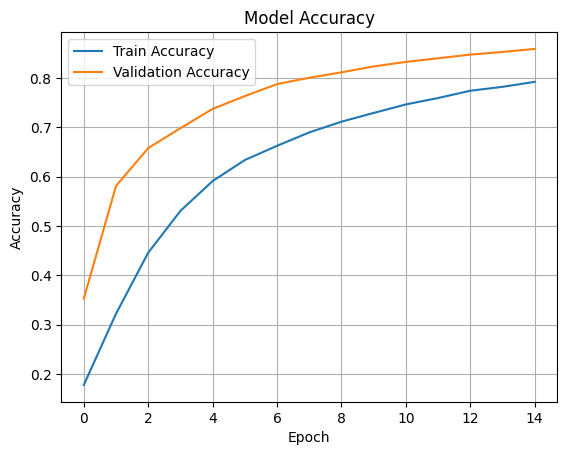

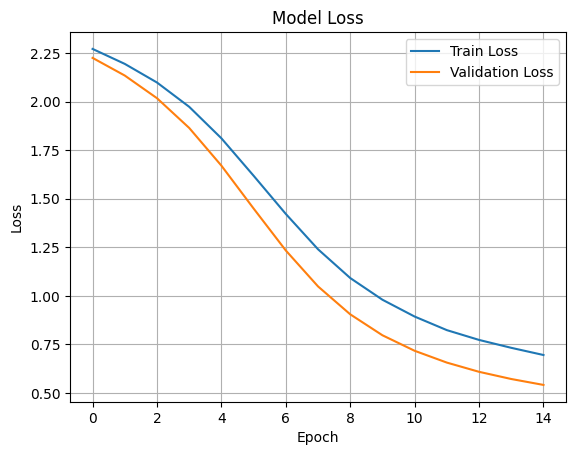

In [ ]:
# Plot accuracy
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


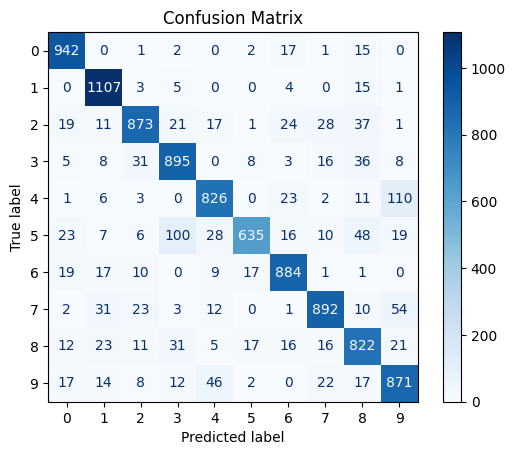

In [ ]:
# Predict class probabilities
y_pred_probs = model.predict(x_test)

# Convert predictions and true labels from one-hot to class indices
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()
